Лабораторна робота №2
Студента групи МІТ-31 (Друга підгрупа)
Шило Івана Костянтиновича

Завдання

1. Створити набір даних за допомогою DatasetGenerator

2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python.

4. Для отриманих наборів даних провести встановленні кроки моделювання.

5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab2.

2. Моделювання для набору даних з сайту - https://www.kaggle.com/mysarahmadbhat/alcohol-consumption

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#!pip install -U scikit-learn

In [24]:
df = pd.read_csv('drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [26]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<AxesSubplot:>

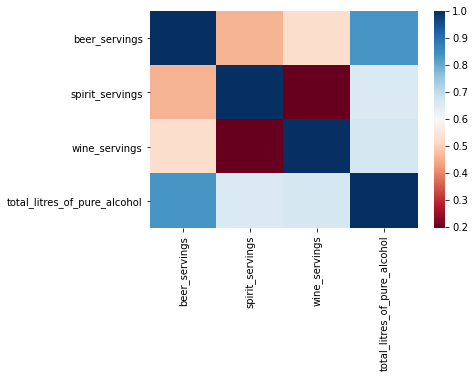

In [27]:
correlation = df.corr()
sns.heatmap(correlation, cmap = "RdBu")

In [28]:
from sklearn.model_selection import train_test_split
columns = df.columns
columns = columns[:4]
X = df[['beer_servings', 'spirit_servings', 'wine_servings']]
y=df[['total_litres_of_pure_alcohol']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [29]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)
y_Hat = Lr.predict(X_test)
y_Hat

array([[ 6.03080595],
       [ 1.10741367],
       [ 0.89875311],
       [10.508835  ],
       [ 0.99423016],
       [10.33570271],
       [ 0.89875311],
       [ 5.90696014],
       [ 9.81180655],
       [ 1.85091893],
       [10.85564871],
       [12.28359731],
       [ 0.99903768],
       [ 0.89875311],
       [10.92745001],
       [ 9.19239965],
       [ 7.75827754],
       [ 1.16283823],
       [ 6.60114976],
       [ 0.89875311],
       [ 3.66877936],
       [ 2.92022118],
       [ 8.47342871],
       [ 4.67211887],
       [ 6.76037447],
       [ 3.22834682],
       [ 3.44790218],
       [ 1.76965705],
       [ 5.18143626],
       [ 1.24118728],
       [ 1.00454931],
       [ 1.30674842],
       [ 0.89875311],
       [ 8.39817402],
       [ 2.1793411 ],
       [ 7.06891408],
       [ 1.53974607],
       [ 6.98276914],
       [ 2.20339769],
       [ 1.65991664],
       [ 7.77348746],
       [ 6.57552733],
       [ 1.7236693 ],
       [ 5.28924355],
       [ 3.99795819],
       [ 5

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_Hat)

0.7138901063843511

In [31]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

1.1664765235912755

In [32]:
result = pd.DataFrame(y_test)
result['predicted'] = y_Hat

result.head()

,total_litres_of_pure_alcohol,L_predicted
163,5.6,6.030806
80,0.2,1.107414
103,0.0,0.898753
48,10.4,10.508835
171,0.1,0.994230
